# Fake News Detection 

## Import Used libraries

In [1]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Read Data from Csv File
data = pd.read_csv('/home/ahmed/Desktop/fake_news_detection/news.csv')

### Data Exploration

In [3]:
data.shape

(6335, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
data.label

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [7]:
labels = data.label

In [8]:
# Delete rows withn missing values 
data.dropna(inplace=True)

In [9]:
# Split the data into train 70% , test 30%
x_train,x_test,y_train,y_test=train_test_split(data['text'], labels, test_size=0.3, random_state=7)

In [10]:
# initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [11]:
# Plotting the confusion matrix
def show_cm(cm):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

### Logistic Regression

In [12]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(tfidf_train, y_train)

# Make predictions
y_pred = model.predict(tfidf_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9137296159915834


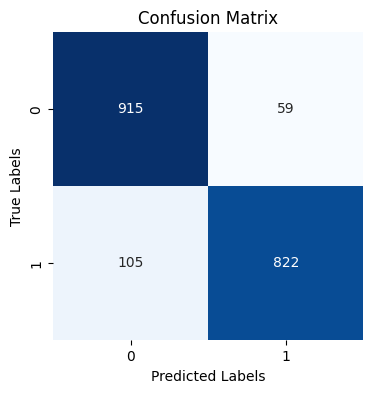

In [13]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
show_cm(cm)

### Naive Bayes

In [14]:
model= MultinomialNB()
model.fit(tfidf_train, y_train)

# Make predictions
y_pred = model.predict(tfidf_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8211467648605997


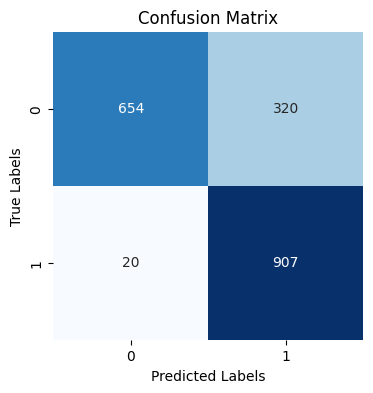

In [15]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
show_cm(cm)

### Decision Tree 

In [16]:
model= DecisionTreeClassifier()
model.fit(tfidf_train, y_train)

# Make predictions
y_pred = model.predict(tfidf_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8195686480799579


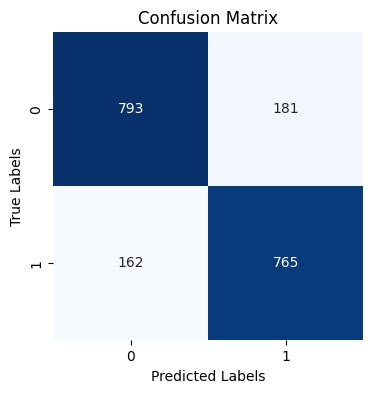

In [17]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
show_cm(cm)

### Passive Aggressive 

In [18]:
model= PassiveAggressiveClassifier()
model.fit(tfidf_train, y_train)

# Make predictions
y_pred = model.predict(tfidf_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.923198316675434


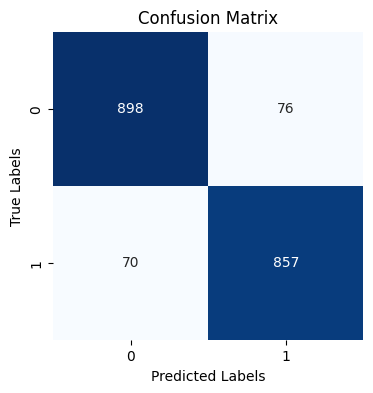

In [19]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
show_cm(cm)

# Conclusion

## It's Demo Project, that detect fake news, predict news to real or fake 

## Using collected dataset with about 6k instances, Ensure that no missing values, then applied tfidfvectorizer then train different classifiers with the data

## It shows that highest accuracy with PassiveAggressive (92.3%) and Logistic Regression Classifiers (91.3%).

